<a href="https://colab.research.google.com/github/SayanAndrews2002/Santa-Clara-County-COVID-19-Data-Project./blob/main/CovidDataSantaClaraCounty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
covid=pd.read_csv('COVID-19_case_counts_by_date.csv')

In [ ]:
death=pd.read_csv('Count_of_deaths_with_COVID-19_by_date.csv')

In [ ]:
covid.head()

Date  Total_cases  New_cases  New_cases_7davg
0  2020/01/27            1          1              NaN
1  2020/01/28            2          1              NaN
2  2020/01/29            3          1              NaN
3  2020/01/30            4          1              NaN
4  2020/01/31            6          2              NaN

In [ ]:
count = 0
import csv
import io
covidfile = open('COVID-19_case_counts_by_date.csv', newline='')
covidreader = csv.reader(covidfile)
#covidweeksfname = 'COVID_weeks.csv'
#covidweeksfh = open(covidweeksfname, 'w')
covidweeksfh = io.StringIO()
covidweekscsv = csv.writer(covidweeksfh)
sum = 0
covidweekscsv.writerow(['Date', 'Weekly Average'])
for element in covidreader:
  #print(count, element)
  if count > 0:
    sum += int(element[2])
  count += 1
  #print(sum)
  if count % 7 == 0:
    average = sum/7
    covidweekscsv.writerow([element[0], average])
    sum = 0
  #if count > 140:
    #break
#print("starting printing")
covidweeksfh.seek(0)
for line in covidweeksfh:
  print(line)
#print("ending printing")


In [ ]:
covidweeksfh.seek(0)
covidweeks = pd.read_csv(covidweeksfh)
covidweeks['Date'] = pd.to_datetime(covidweeks['Date'], format='%Y-%m-%d')
indexed_covid=covidweeks.set_index('Date')
ts1 = indexed_covid['Weekly Average']

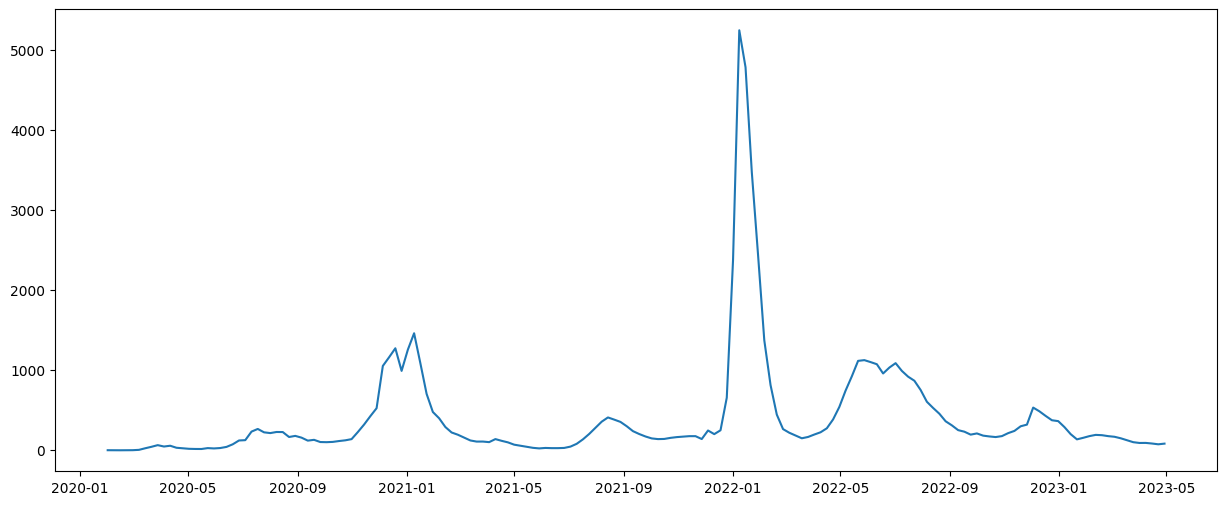

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(ts1)
plt.show()

In [ ]:
covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m-%d')
indexed_covid=covid.set_index('Date')
ts = indexed_covid['New_cases']

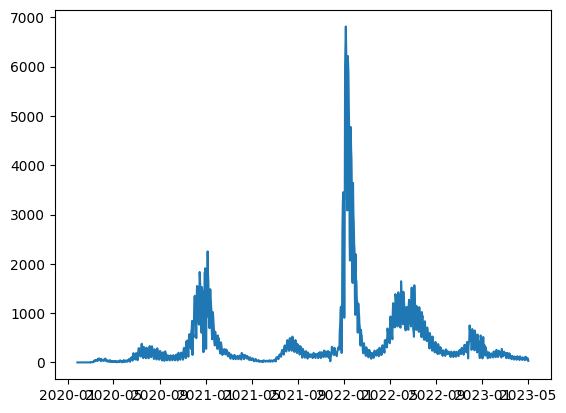

In [ ]:
plt.plot(ts)
plt.show()

In [ ]:
death['Date'] = pd.to_datetime(death['Date'], format='%Y-%m-%d')
indexed_death=death.set_index('Date')
id = indexed_death['Total']

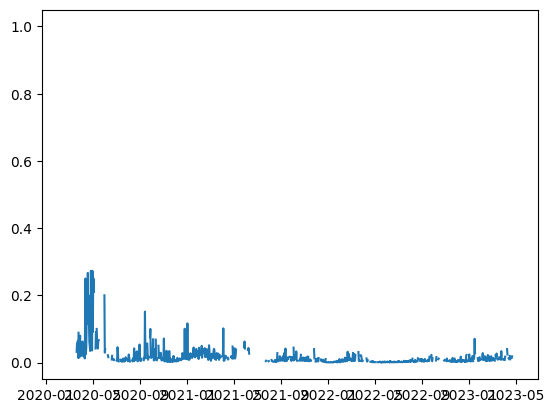

In [ ]:
plt.plot(id/ts)
plt.show()

In [ ]:
import numpy as np
import calendar

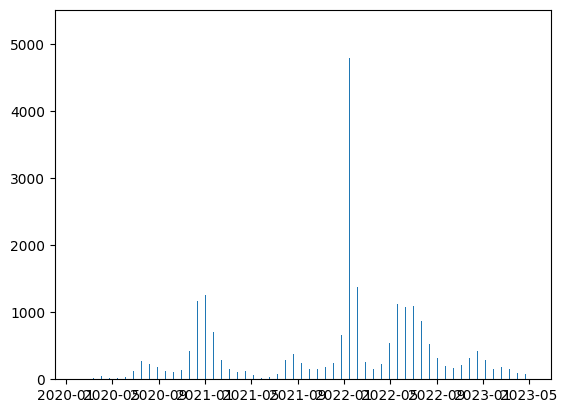

In [ ]:
fig, ax = plt.subplots()
covidweeksplot = ax.bar(covidweeks['Date'], covidweeks['Weekly Average'])
#for rect in covidweeksplot:
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show();

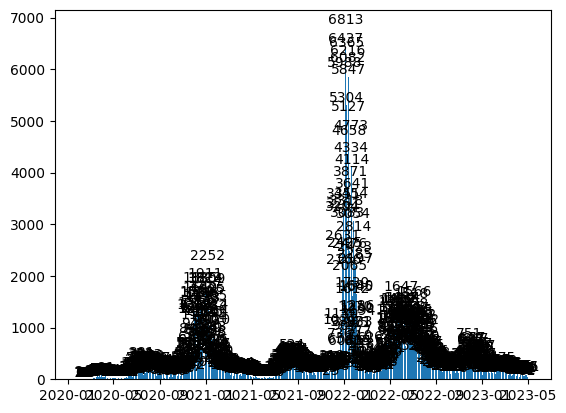

In [ ]:
fig, ax = plt.subplots()
covidplot = ax.bar(covid['Date'], covid['New_cases'])
for rect in covidplot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show();

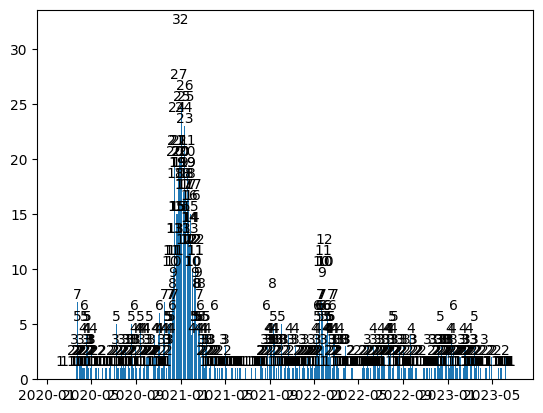

In [ ]:
fig, ax = plt.subplots()
deathplot = ax.bar(death['Date'], death['Total'])
for rect in deathplot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show();

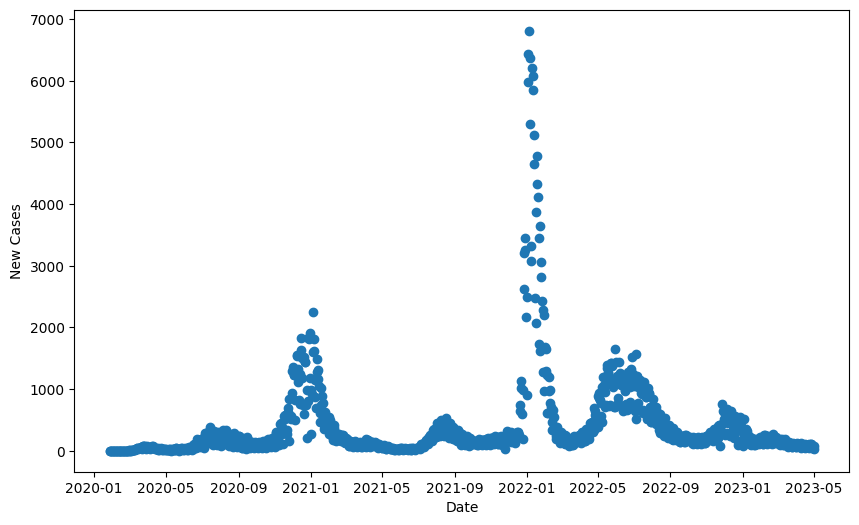

In [ ]:
plt.figure(figsize=(10,6))
x = covid['Date']
y=covid['New_cases']
plt.scatter(x,y)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

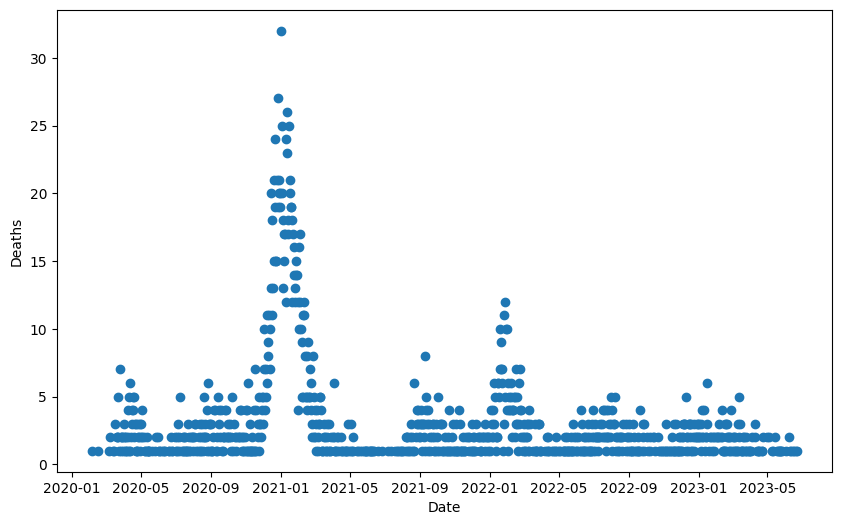

In [ ]:
plt.figure(figsize=(10,6))
x = death['Date']
y=death['Total']
plt.scatter(x,y)
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

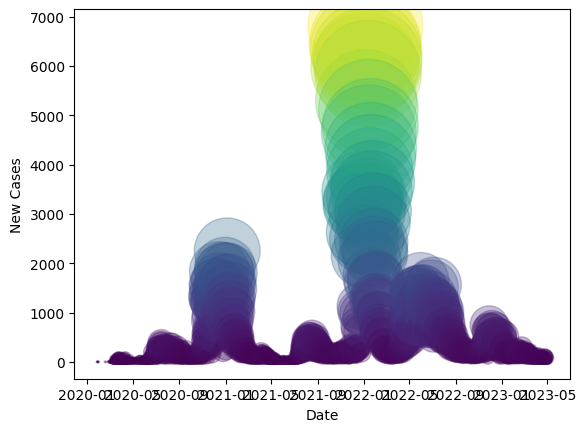

In [ ]:
plt.scatter(covid['Date'], covid['New_cases'],
           s=ts,
           c=ts,
           alpha=0.3)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

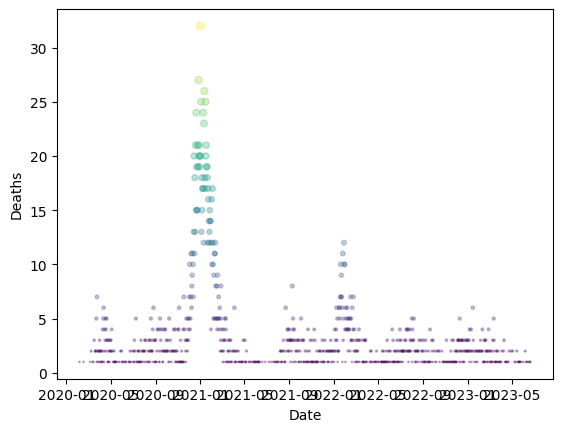

In [ ]:
plt.scatter(death['Date'], death['Total'],
           s=id,
           c=id,
           alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

In [ ]:
covid.head(5)

Date  Total_cases  New_cases  New_cases_7davg
0 2020-01-27            1          1              NaN
1 2020-01-28            2          1              NaN
2 2020-01-29            3          1              NaN
3 2020-01-30            4          1              NaN
4 2020-01-31            6          2              NaN

In [ ]:
death.head(5)

Date  LTCF  Non_ltcf  Total  Cumulative
0 2020-02-06     0         1      1           1
1 2020-02-17     0         1      1           2
2 2020-03-06     0         1      1           3
3 2020-03-09     0         2      2           5
4 2020-03-13     0         1      1           6

In [ ]:
covid_year = covid.groupby('Date').sum()
covid_year.head()

Total_cases  New_cases  New_cases_7davg
Date                                               
2020-01-27            1          1              0.0
2020-01-28            2          1              0.0
2020-01-29            3          1              0.0
2020-01-30            4          1              0.0
2020-01-31            6          2              0.0

In [ ]:
death_year = death.groupby('Date').sum()
death_year.head()

LTCF  Non_ltcf  Total  Cumulative
Date                                         
2020-02-06     0         1      1           1
2020-02-17     0         1      1           2
2020-03-06     0         1      1           3
2020-03-09     0         2      2           5
2020-03-13     0         1      1           6

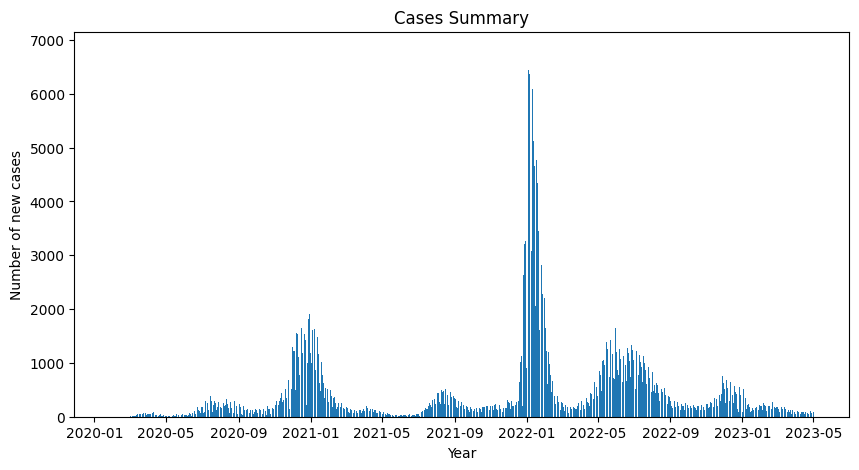

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(covid_year.index, 'New_cases', data=covid_year)
ax.set_xlabel('Year')
ax.set_ylabel('Number of new cases')
ax.set_title('Cases Summary')
plt.show()

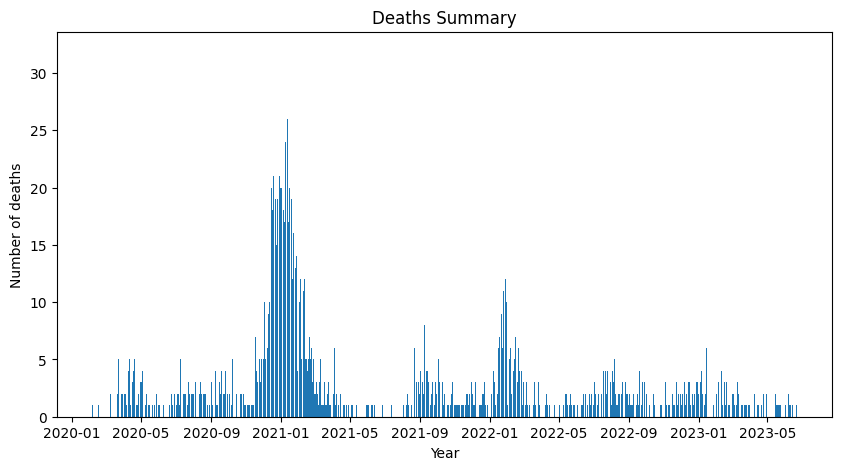

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(death_year.index, 'Total', data=death_year)
ax.set_xlabel('Year')
ax.set_ylabel('Number of deaths')
ax.set_title('Deaths Summary')
plt.show()

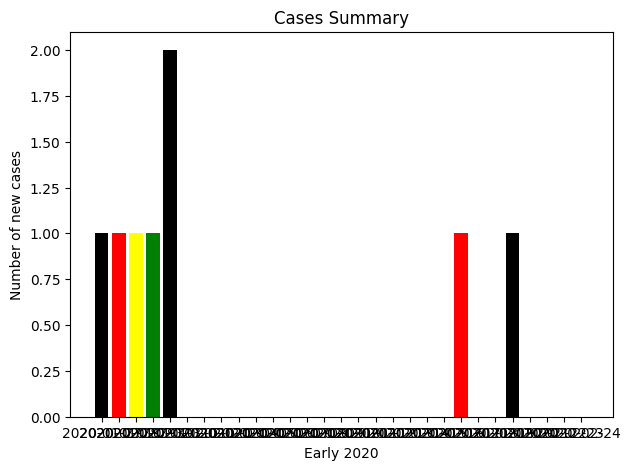

In [ ]:
filter_df = covid_year[0:29]
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(filter_df.index, 'New_cases', color = ['black','red','yellow','green'], data=filter_df)
ax.set_xlabel('Early 2020')
ax.set_ylabel('Number of new cases')
ax.set_title('Cases Summary')
ax.set_xticks(filter_df.index)
plt.show()

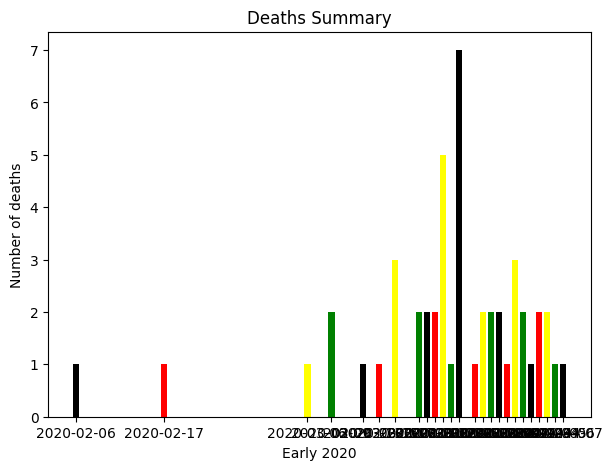

In [ ]:
filter_df = death_year[0:25]
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(filter_df.index, 'Total', color = ['black','red','yellow','green'], data=filter_df)
ax.set_xlabel('Early 2020')
ax.set_ylabel('Number of deaths')
ax.set_title('Deaths Summary')
ax.set_xticks(filter_df.index)
plt.show()

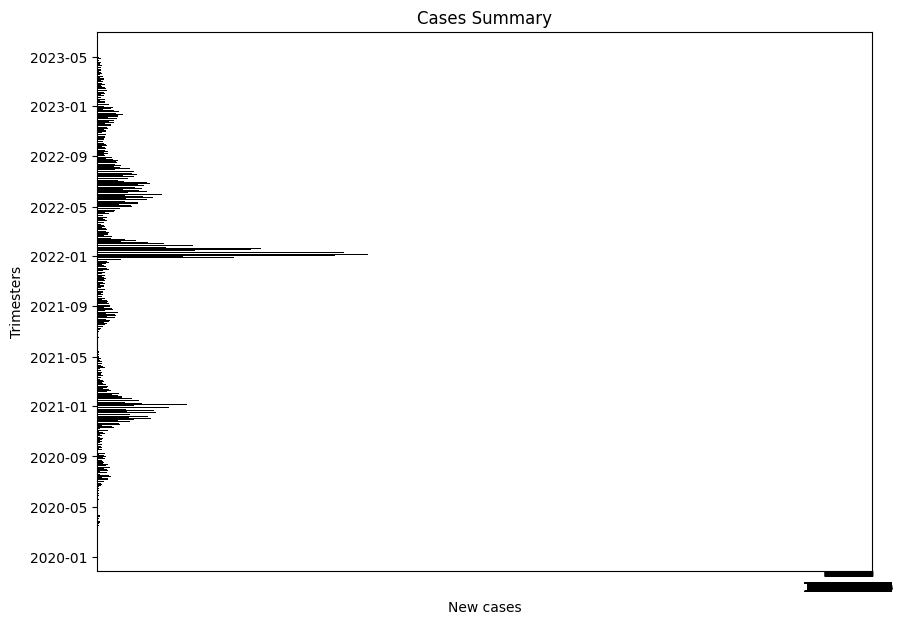

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(covid_year.index, 'New_cases', color = 'black', data=covid_year)
ax.set_xlabel('New cases')
ax.set_ylabel('Trimesters')
ax.set_title('Cases Summary')
ax.set_xticks(covid_year.index)
plt.show()

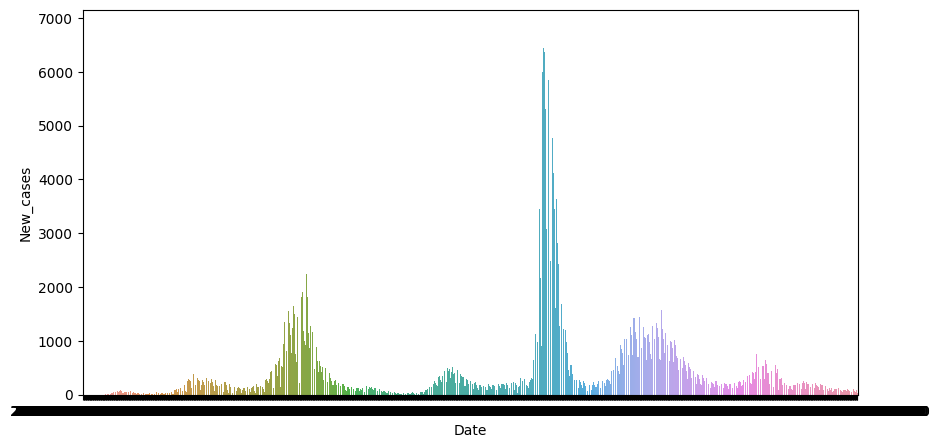

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(x = covid_year.index, y = 'New_cases', data=covid_year, ax=ax)
plt.show()

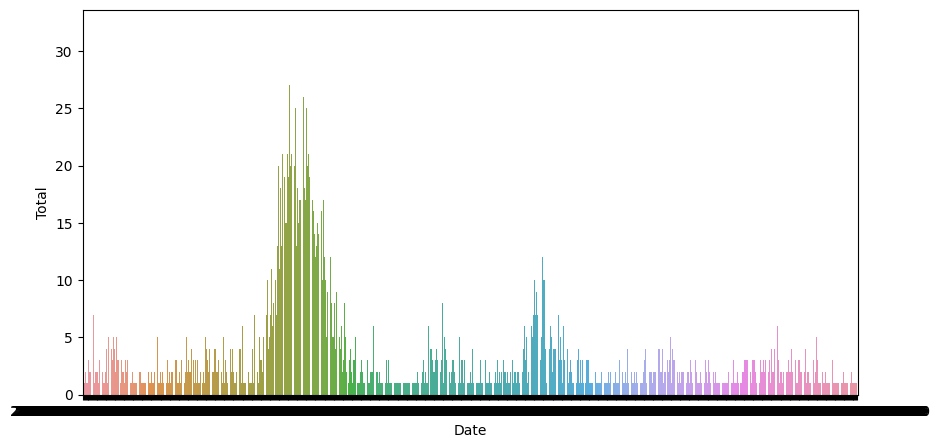

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(x = death_year.index, y = 'Total', data=death_year, ax=ax)
plt.show()

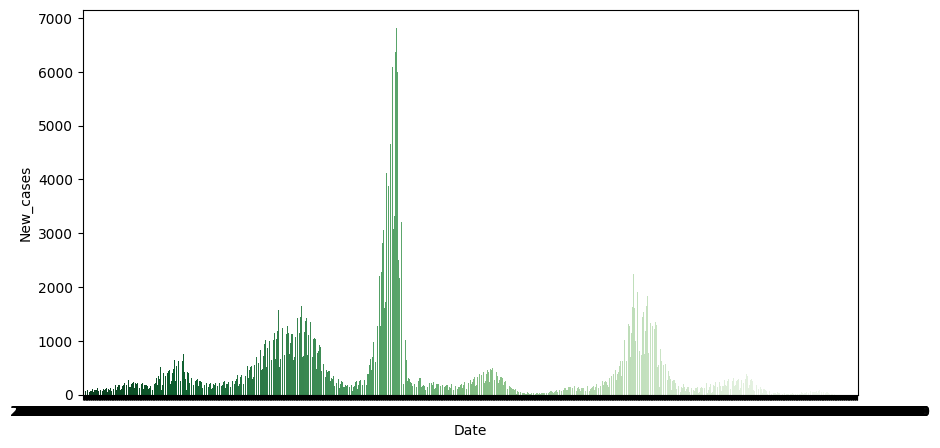

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(x = covid_year.index, y = 'New_cases', palette='Greens', data=covid_year, ax=ax)
ax.invert_xaxis()
plt.show()

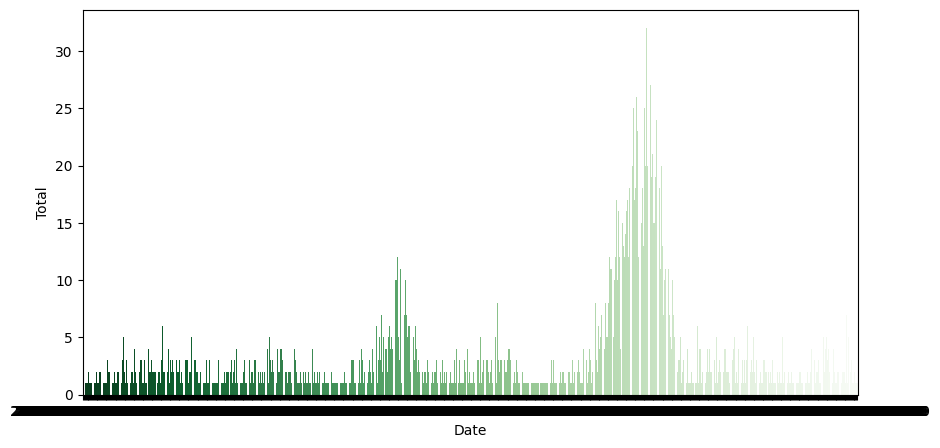

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.barplot(x = death_year.index, y = 'Total', palette='Greens', data=death_year, ax=ax)
ax.invert_xaxis()
plt.show()

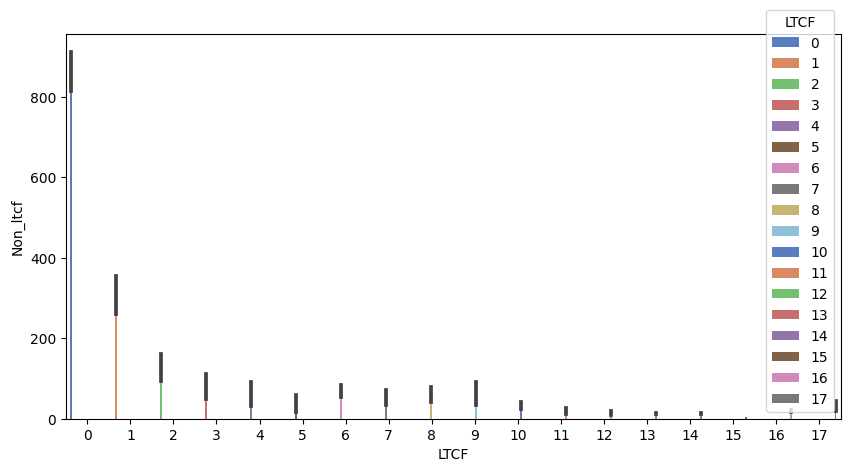

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=death_year['LTCF'], y=death_year['Non_ltcf'], hue=death_year['LTCF'], data=covid_year, palette="muted", estimator=sum, ax=ax)
plt.show()

In [ ]:
number1 = covid_year.groupby('New_cases')['New_cases_7davg'].sum()
print(number1)

New_cases
0          5.714286
1          0.428571
2         29.571429
3         15.714286
4          7.000000
           ...     
6082    5311.571429
6216    5362.285714
6365    4452.714286
6437    3529.000000
6813    4009.285714
Name: New_cases_7davg, Length: 588, dtype: float64


In [ ]:
number2 = death_year.groupby('Non_ltcf')['LTCF'].sum()
print(number2)

Non_ltcf
0     127
1     138
2      82
3      46
4      95
5      65
6      75
7      59
8      55
9      80
10     14
11     55
12      5
14     20
15     17
16     17
17      9
Name: LTCF, dtype: int64


In [ ]:
label1 = number1.index
label2=number2.index

In [ ]:
mycolor1 = ['#e5ed05','#e8e8df']
mycolor2 = ['#ff9999','#66b3ff','#99ff99']

<ipython-input-34-7b5d799081d6>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


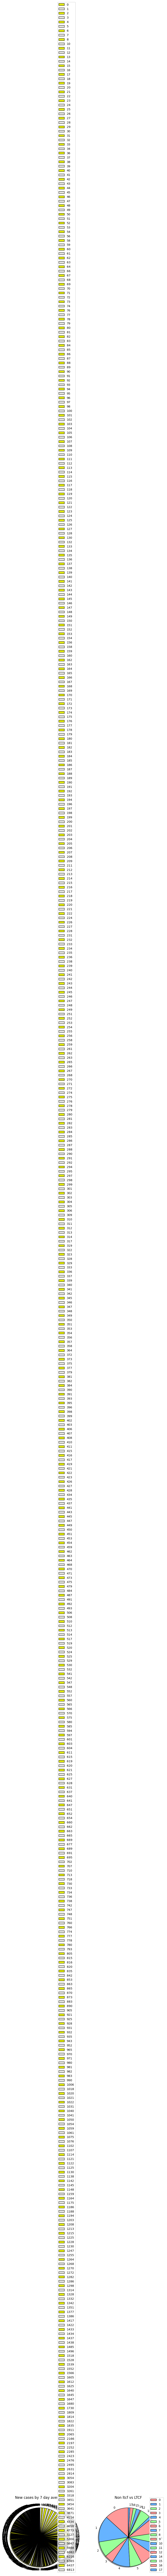

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))

ax1.set_title('New cases by 7 day average')
ax1.pie(number1, labels=label1, wedgeprops={'edgecolor':'black'}, colors=mycolor1, shadow=True, startangle=90)
ax1.legend(loc='lower right')

ax2.set_title('Non ltcf vs LTCF')
ax2.pie(number2, labels=label2, wedgeprops={'edgecolor':'black'}, colors=mycolor2, shadow=True, startangle=90)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

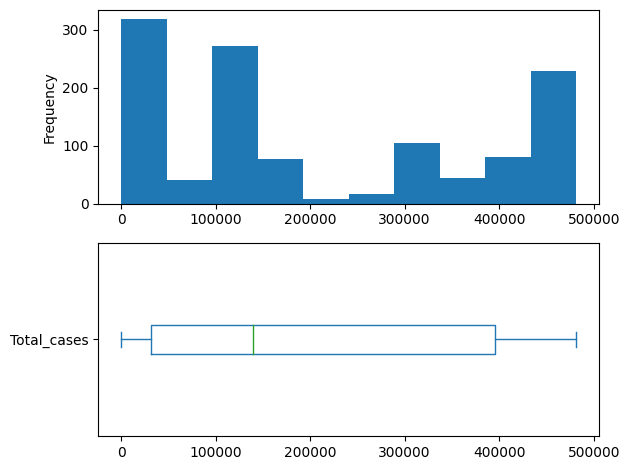

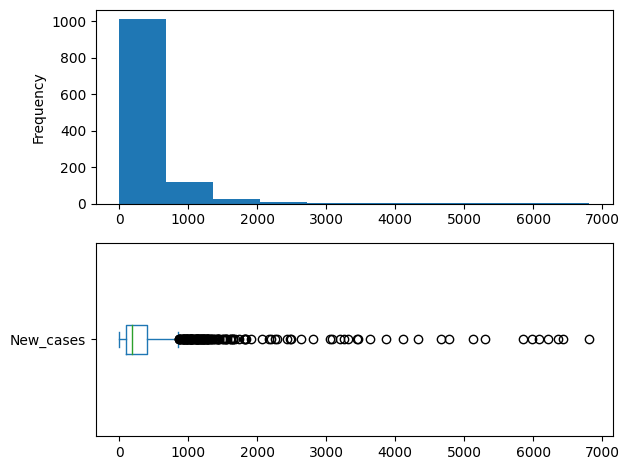

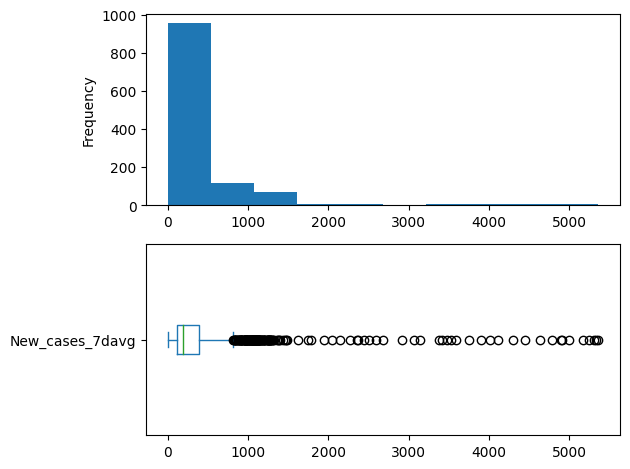

In [ ]:
numerical_attributes = ['Total_cases', 'New_cases', 'New_cases_7davg'] # Open the dataset you will see these attributes

for att in numerical_attributes:
    plt.subplot(2,1,1)
    covid[att].plot.hist()  # We will take each attribute in the attribute array and plot them in a histogram
    plt.subplot(2,1,2)
    covid[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

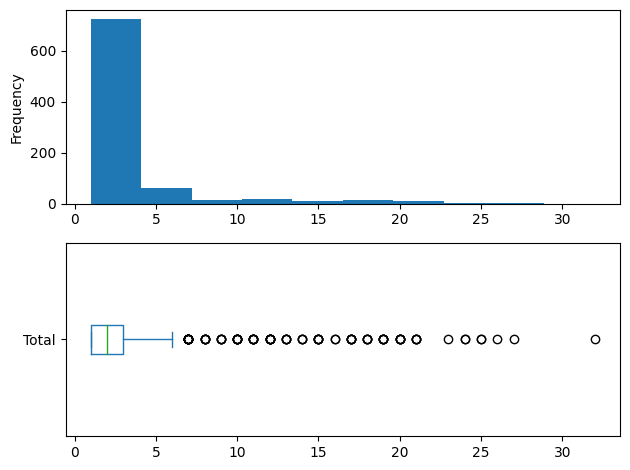

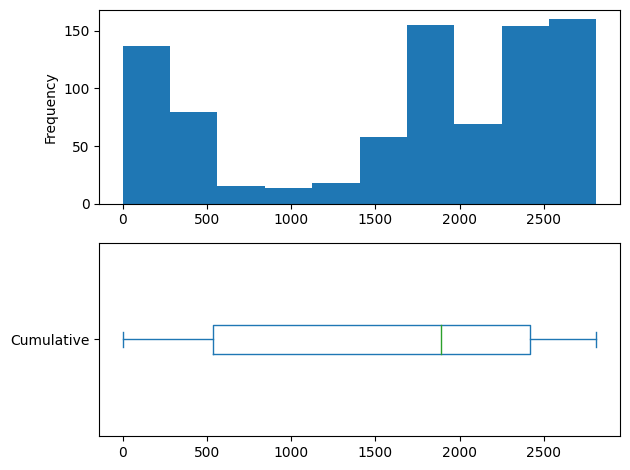

In [ ]:
numerical_attributes2 = ['Total', 'Cumulative'] # Open the dataset you will see these attributes

for att in numerical_attributes2:
    plt.subplot(2,1,1)
    death[att].plot.hist()  # We will take each attribute in the attribute array and plot them in a histogram
    plt.subplot(2,1,2)
    death[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

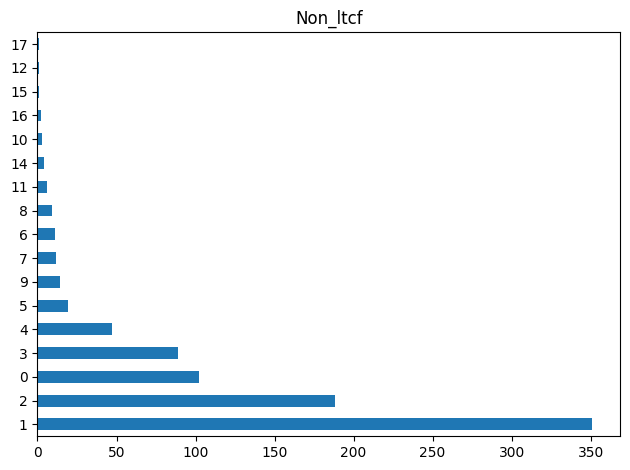

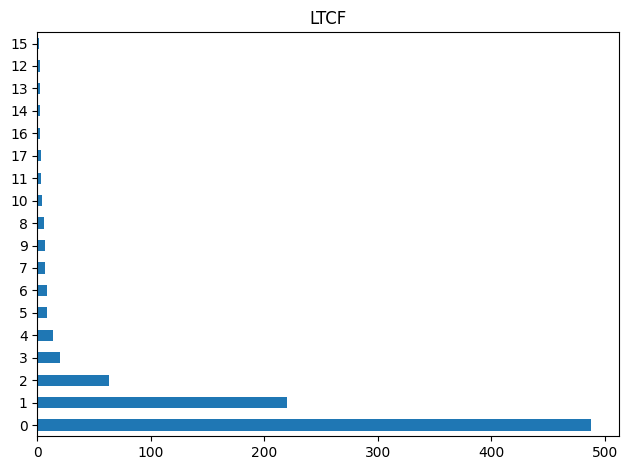

In [ ]:
categorical_attributes = ['Non_ltcf', 'LTCF']

for att in categorical_attributes:
    death[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

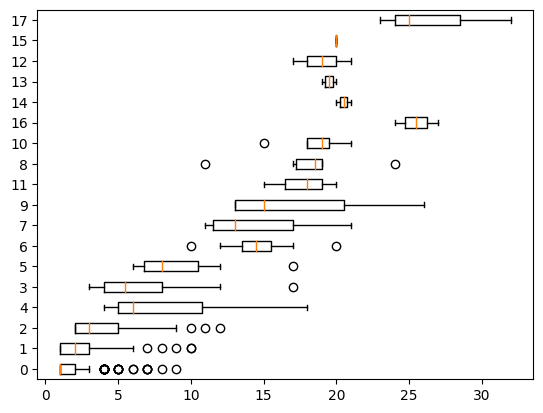

In [ ]:
LTCF = death.LTCF.unique()

box_sr = pd.Series('',index = LTCF)

for poss in LTCF:
    BM = death.LTCF == poss
    box_sr[poss] = death[BM]['Total']

plt.boxplot(box_sr,vert=False)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],LTCF)
plt.show()

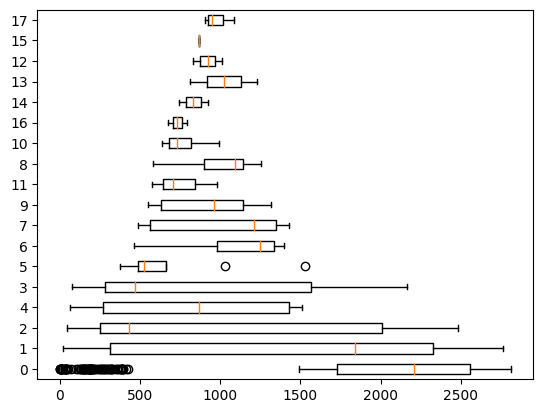

In [ ]:
dataForBox_dic= {}

for poss in LTCF:
    BM = death.LTCF == poss
    dataForBox_dic[poss] = death[BM]['Cumulative']

plt.boxplot(dataForBox_dic.values(),vert=False)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],LTCF)
plt.show()

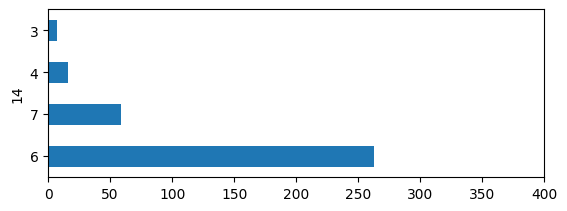

In [ ]:
nonltcf = death.Non_ltcf.unique()

for i,poss in enumerate(nonltcf):
    plt.subplot(2,1,1)
    BM = death.Non_ltcf == poss
    death[BM].LTCF.value_counts().plot.barh()
    plt.xlim([0,400])
    plt.ylabel(poss)

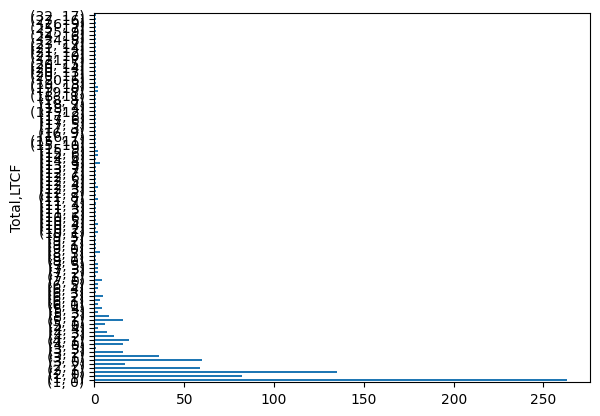

In [ ]:
death.groupby(['Total','LTCF']).size().plot.barh()
plt.show()

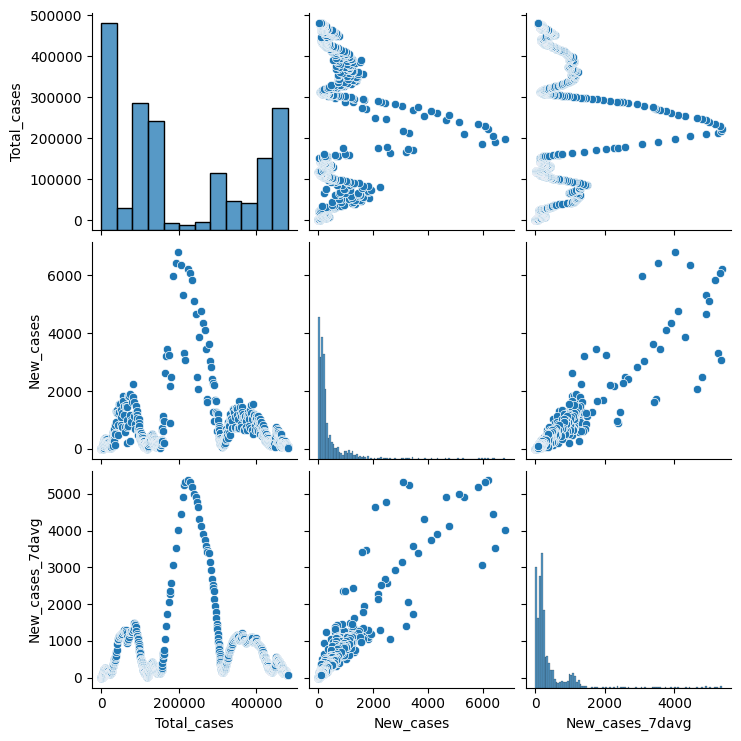

In [ ]:
sns.pairplot(covid)

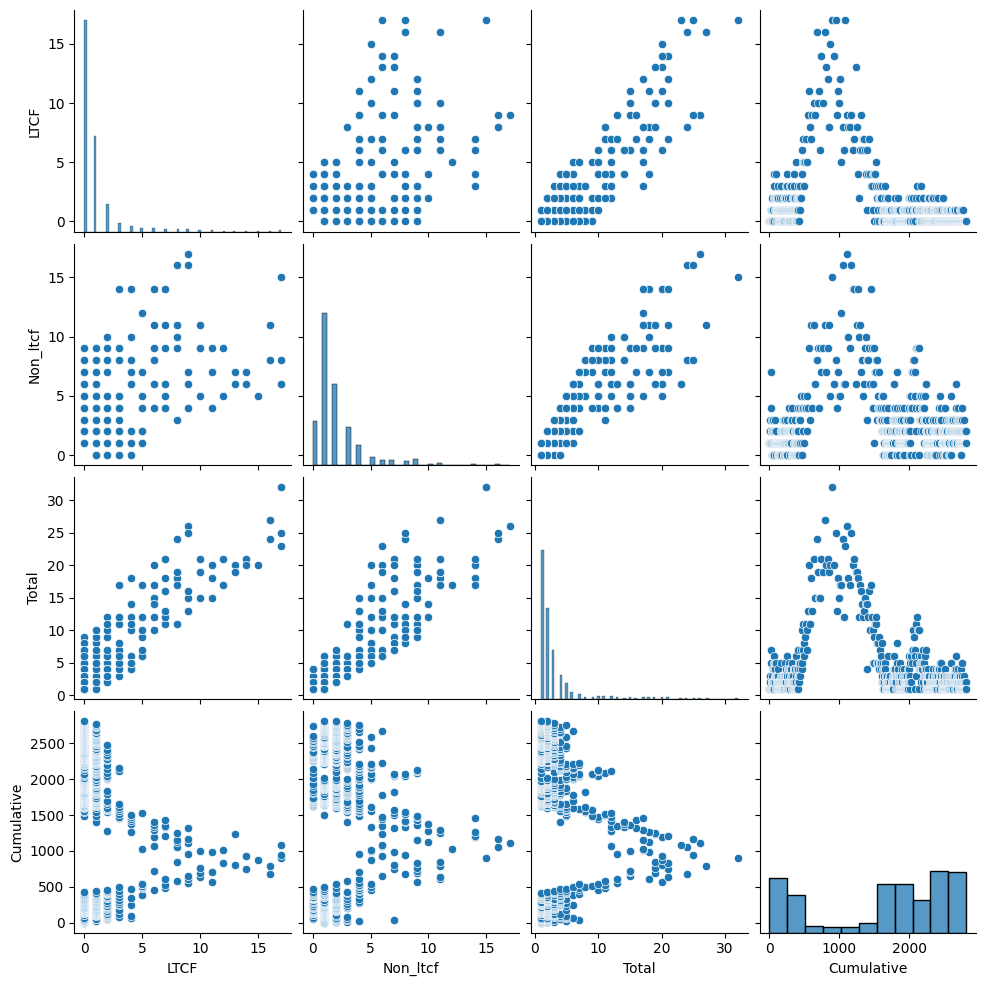

In [ ]:
sns.pairplot(death)

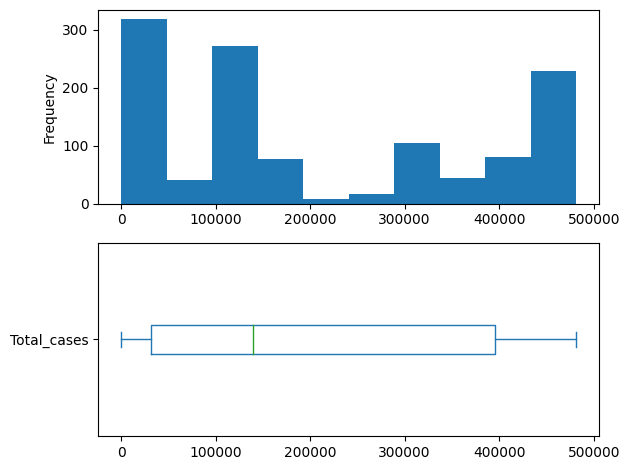

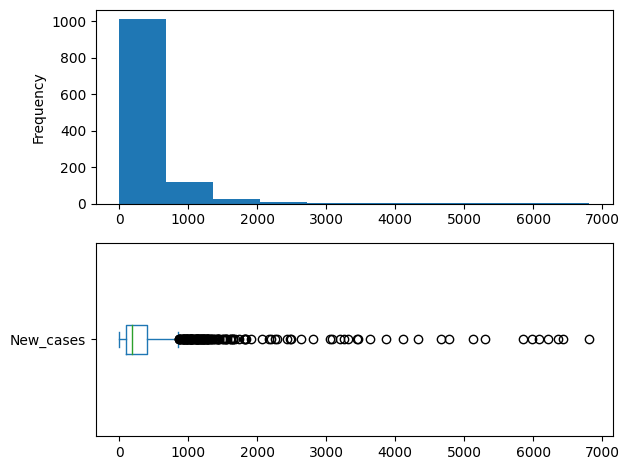

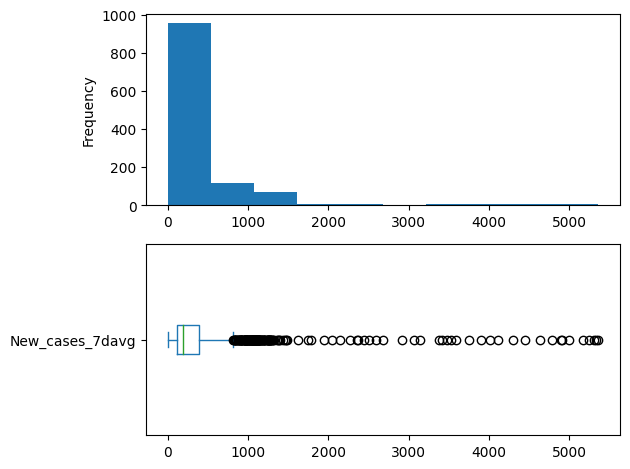

In [ ]:
numerical_attributes = ['Total_cases', 'New_cases', 'New_cases_7davg']

for att in numerical_attributes:
    plt.subplot(2,1,1)
    covid[att].plot.hist()
    plt.subplot(2,1,2)
    covid[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

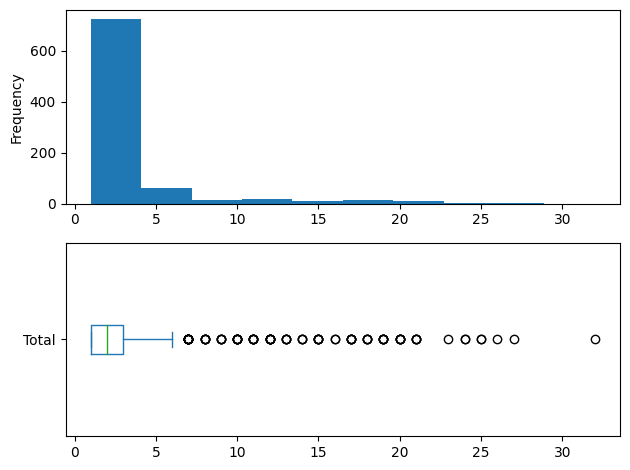

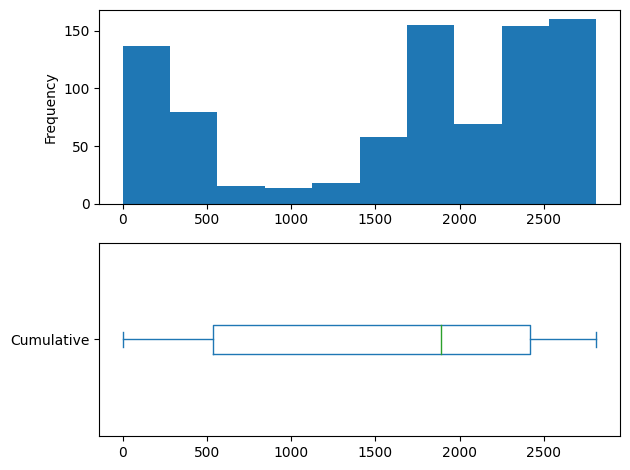

In [ ]:
numerical_attributes = ['Total', 'Cumulative']

for att in numerical_attributes:
    plt.subplot(2,1,1)
    death[att].plot.hist()
    plt.subplot(2,1,2)
    death[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

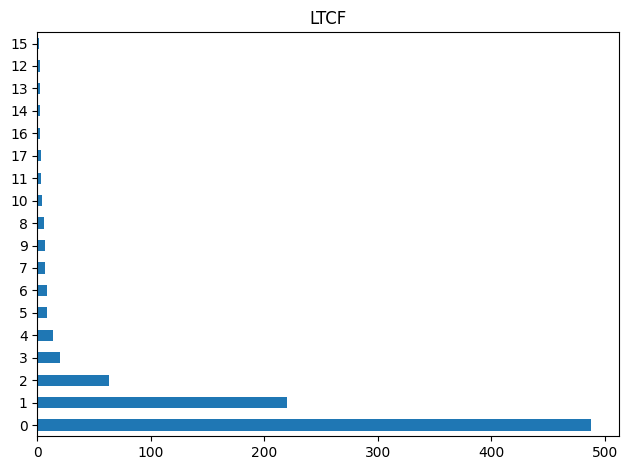

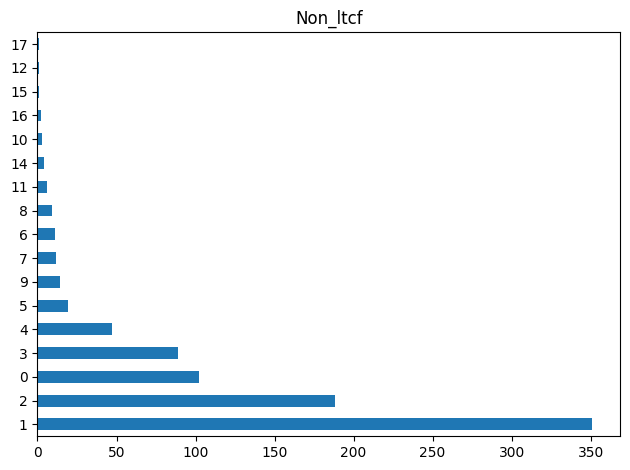

In [ ]:
categorical_attributes = ['LTCF', 'Non_ltcf']

for att in categorical_attributes:
    death[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

In [ ]:
table = pd.crosstab(death.Non_ltcf, death.Total)

In [ ]:
table

Total      1    2   3   4   5   6   7   8   9   10  ...  18  19  20  21  23  \
Non_ltcf                                            ...                       
0          82   17   1   2   0   0   0   0   0   0  ...   0   0   0   0   0   
1         263   59  16   7   4   2   0   0   0   0  ...   0   0   0   0   0   
2           0  135  36  11   2   2   2   0   0   0  ...   0   0   0   0   0   
3           0    0  60  19   8   1   0   0   0   0  ...   0   0   0   0   0   
4           0    0   0  16  16   5   2   0   1   1  ...   0   0   0   0   0   
5           0    0   0   0   6   3   2   3   0   1  ...   0   0   1   0   0   
6           0    0   0   0   0   2   1   0   0   2  ...   0   1   1   0   1   
7           0    0   0   0   0   0   4   1   1   0  ...   1   0   1   1   0   
8           0    0   0   0   0   0   0   1   1   1  ...   0   0   0   0   0   
9           0    0   0   0   0   0   0   0   1   2  ...   0   2   1   1   0   
10          0    0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   
11          0    0   0   0   0   0   0   0   0   0  ...   1   2   0   1   0   
12          0    0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
14          0    0   0   0   0   0   0   0   0   0  ...   1   0   1   1   0   
15          0    0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
16          0    0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
17          0    0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

Total     24  25  26  27  32  
Non_ltcf                      
0          0   0   0   0   0  
1          0   0   0   0   0  
2          0   0   0   0   0  
3          0   0   0   0   0  
4          0   0   0   0   0  
5          0   0   0   0   0  
6          0   0   0   0   0  
7          0   0   0   0   0  
8          1   1   0   0   0  
9          0   0   0   0   0  
10         0   0   0   0   0  
11         0   0   0   1   0  
12         0   0   0   0   0  
14         0   0   0   0   0  
15         0   0   0   0   1  
16         1   1   0   0   0  
17         0   0   1   0   0  

[17 rows x 27 columns]

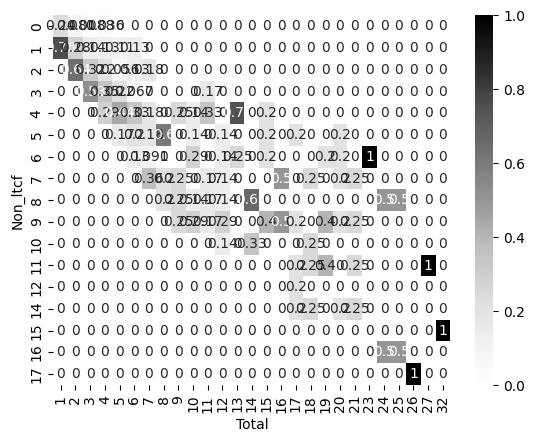

In [ ]:
propability_table = table/table.sum()
sns.heatmap(propability_table, annot=True, center=0.5, cmap="Greys")
plt.show()

In [ ]:
table1 = pd.crosstab(death.LTCF, death.Non_ltcf)

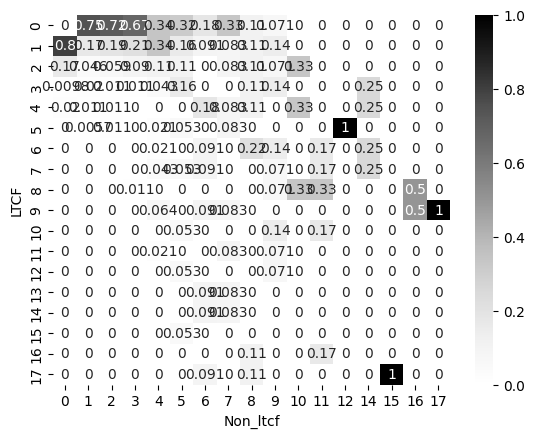

In [ ]:
propability_table1 = table1/table1.sum()
sns.heatmap(propability_table1, annot=True, center=0.5, cmap="Greys")
plt.show()

In [ ]:
death_categorical = pd.cut(death.Total, bins=5)
table2 = pd.crosstab(death_categorical, death.LTCF)

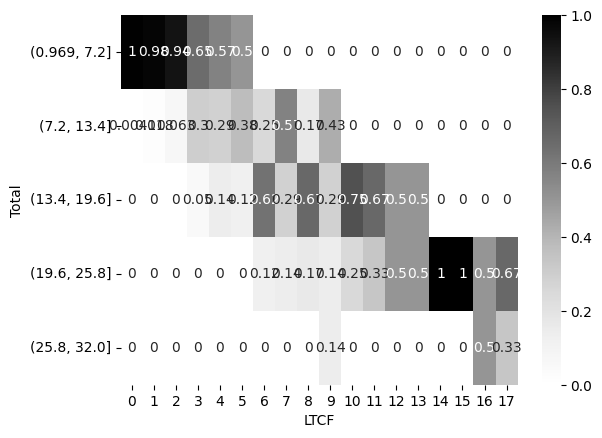

In [ ]:
propability_table2 = table2/table2.sum()
sns.heatmap(propability_table2, annot=True, center=0.5, cmap="Greys")
plt.show()

In [ ]:
pd.DataFrame(covid.groupby(['New_cases','New_cases_7davg']).size()).drop(columns=[0]).reset_index().sort_values('New_cases_7davg').reset_index(drop=True).transpose()

0         1         2         3         4         5     \
New_cases         0.0  0.000000  1.000000  0.000000  1.000000  0.000000   
New_cases_7davg   0.0  0.142857  0.142857  0.285714  0.285714  0.428571   

                     6         7         8         9     ...         1152  \
New_cases        2.000000  0.000000  2.000000  0.000000  ...  2065.000000   
New_cases_7davg  0.428571  0.571429  0.571429  0.714286  ...  4638.714286   

                        1153    1154         1155         1156         1157  \
New_cases        2476.000000  5304.0  4658.000000  5127.000000  5847.000000   
New_cases_7davg  4784.142857  4901.0  4904.428571  4996.714286  5173.571429   

                        1158         1159         1160         1161  
New_cases        3318.000000  6082.000000  3083.000000  6216.000000  
New_cases_7davg  5245.714286  5311.571429  5329.714286  5362.285714  

[2 rows x 1162 columns]

In [ ]:
covid.groupby(['New_cases','New_cases_7davg']).size()

New_cases  New_cases_7davg
0          0.000000           10
           0.142857            4
           0.285714            5
           0.428571            1
           0.571429            1
                              ..
6082       5311.571429         1
6216       5362.285714         1
6365       4452.714286         1
6437       3529.000000         1
6813       4009.285714         1
Length: 1162, dtype: int64

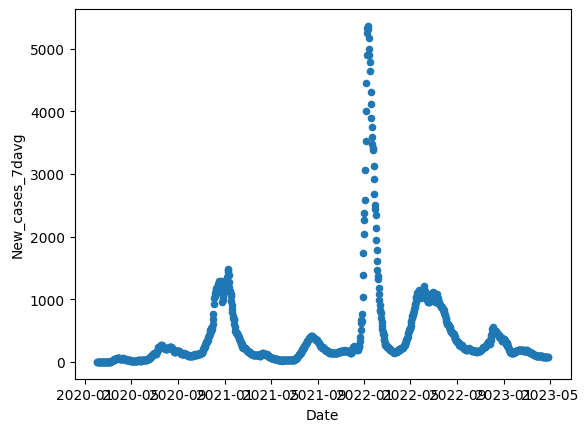

In [ ]:
covid.plot.scatter(x='Date',y='New_cases_7davg')
plt.show()

In [ ]:
covid_categorical = pd.cut(covid['New_cases_7davg'], bins=5)

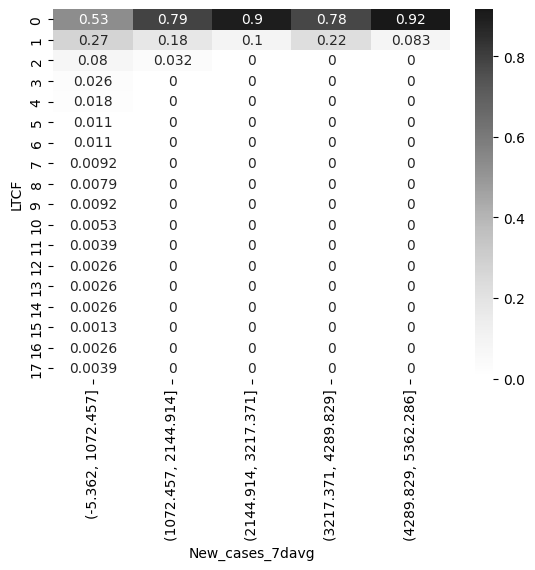

In [ ]:
table3 = pd.crosstab(death.LTCF,covid_categorical)
propability_table3 = table3/table3.sum()
sns.heatmap(propability_table3, annot=True, center=0.5, cmap="Greys")
plt.show()

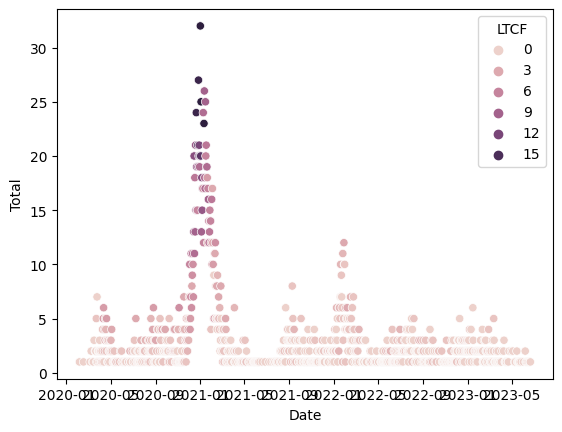

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Date', y='Total', hue='LTCF', data=death)
plt.show()

In [ ]:
import altair as alt

In [ ]:
alt.Chart(death).mark_circle().encode(
x='Date',
y='Total',
color='LTCF:N',
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(death).mark_circle().encode(
x='Date',
y='Total',
color='LTCF:N',
tooltip=['Date','Total', 'Cumulative', 'LTCF', 'Non_ltcf'],
).interactive()

alt.Chart(...)

In [ ]:
selected_area = alt.selection_interval()

In [ ]:
alt.Chart(death).mark_circle().encode(
x='Date',
y='Total',
color='LTCF:N'
).add_selection(
selected_area
)

alt.Chart(...)

In [ ]:
selected_area = alt.selection_interval()
alt.Chart(death).mark_circle().encode(
x='Date',
y='Total',
color=alt.condition(selected_area, 'LTCF:N', alt.
value('lightgray'))
).add_selection(
selected_area
)

alt.Chart(...)

In [ ]:
selected_area = alt.selection_interval()

In [ ]:
alt.Chart(death).mark_circle().encode(
x='Date',
y='Total',
color=alt.condition(selected_area, 'LTCF:N', alt.
value('lightgray')),
tooltip=['Date','Total', 'Cumulative', 'LTCF', 'Non_ltcf'],
).interactive().add_selection(
selected_area
)

alt.Chart(...)

In [ ]:
chart = alt.Chart(death).mark_circle().encode(
y='Total',
color='LTCF:N'
)
chart1 = chart.encode(x='Date')
chart2 = chart.encode(x='Cumulative')
alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

In [ ]:
chart = alt.Chart(death).mark_circle().encode(
y='Total',
color='LTCF:N'
)
chart1 = chart.encode(x='Date')
chart2 = chart.encode(x='Cumulative')
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

In [ ]:
selected_area = alt.selection_interval()
chart = alt.Chart(death).mark_circle().encode(
y='Total',
color=alt.condition(selected_area, 'LTCF', alt.
value('lightgray'))
).add_selection(
selected_area
)
chart1 = chart.encode(x='Date')
chart2 = chart.encode(x='Non_ltcf')
chart1 | chart2

alt.HConcatChart(...)

In [ ]:
input_dropdown= alt.binding_select(options=list(set(death.LTCF)))
selected_points = alt.selection_single(fields=['LTCF'], bind=input_dropdown, name='Select')
color=alt.condition(selected_points, alt.Color('LTCF:N'), alt.value('lightgray'))
alt.Chart(death).mark_circle().encode(
x='Date',
y='LTCF',
color=color,
tooltip='LTCF:N'
).add_selection(
selected_points
)

alt.Chart(...)

In [ ]:
alt.Chart(death).mark_bar().encode(
x='Date:N',
y='Total:Q',
)

alt.Chart(...)

In [ ]:
alt.Chart(covid).mark_bar().encode(
x='New_cases:N',
y='New_cases_7davg',
)

alt.Chart(...)

In [ ]:
alt.Chart(death).mark_bar().encode(
x='Total:N',
y='LTCF:Q',
).properties(width=400)

alt.Chart(...)

In [ ]:
alt.Chart(covid).mark_bar().encode(
x='New_cases_7davg:N',
y='New_cases:Q',
).properties(width=400)

alt.Chart(...)

In [ ]:
alt.Chart(death).mark_bar().encode(
x='Total:N',
y='LTCF:Q',
).properties(width=400).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(covid).mark_bar().encode(
x='New_cases:N',
y='New_cases_7davg:Q',
).properties(width=400).interactive()

alt.Chart(...)

In [ ]:
bars = alt.Chart(death).mark_bar().encode(
x='Date:N',
y='Total:Q',
).properties(width=400)
line = alt.Chart(death).mark_rule(color='firebrick').encode(
y='LTCF:Q',
size=alt.SizeValue(3)
)
alt.layer(bars,line, data=death)

alt.LayerChart(...)

In [ ]:
bars = alt.Chart(covid).mark_bar().encode(
x='Date:N',
y='Total_cases:Q',
).properties(width=400)
line = alt.Chart(covid).mark_rule(color='firebrick').encode(
y='New_cases:Q',
size=alt.SizeValue(3)
)
alt.layer(bars,line, data=covid)

alt.LayerChart(...)

In [ ]:
selected_bars = alt.selection(type='interval', encodings=['x'])
bars = alt.Chart(death).mark_bar().encode(
x='Date:N',
y='Total:Q',
opacity=alt.condition(selected_bars, alt.OpacityValue(1),alt.OpacityValue(0.7))
).properties(width=400).add_selection(selected_bars)
line = alt.Chart(death).mark_rule(color='firebrick').encode(
y='LTCF:Q',
size=alt.SizeValue(3)
).transform_filter(selected_bars)
bars+line

alt.LayerChart(...)

In [ ]:
selected_bars = alt.selection(type='interval', encodings=['x'])
bars = alt.Chart(covid).mark_bar().encode(
x='Date:N',
y='Total_cases:Q',
opacity=alt.condition(selected_bars, alt.OpacityValue(1),alt.OpacityValue(0.7))
).properties(width=400).add_selection(selected_bars)
line = alt.Chart(covid).mark_rule(color='firebrick').encode(
y='New_cases:Q',
size=alt.SizeValue(3)
).transform_filter(selected_bars)
bars+line

alt.LayerChart(...)

In [ ]:
alt.Chart(death).mark_rect().encode(
    alt.X('Total:Q', bin=True),
    alt.Y('LTCF:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='LTCF')
    )
).properties(width=350)

alt.Chart(...)

In [ ]:
alt.Chart(covid).mark_rect().encode(
    alt.X('Total_cases:Q', bin=True),
    alt.Y('New_cases_7davg:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='7 Day Average')
    )
).properties(width=350)

alt.Chart(...)

In [ ]:
heatmap = alt.Chart(death).mark_rect().encode(
    alt.X('Total:Q', bin=True),
    alt.Y('LTCF:Q', bin=True)
)
circles = heatmap.mark_point().encode(
    alt.ColorValue('lightgray'),
    alt.Size('count()',
        legend=alt.Legend(title='LTCF')
    )
)
heatmap + circles

alt.LayerChart(...)

In [ ]:
heatmap2 = alt.Chart(covid).mark_rect().encode(
    alt.X('Total_cases:Q', bin=True),
    alt.Y('New_cases_7davg:Q', bin=True)
)
circles2 = heatmap.mark_point().encode(
    alt.ColorValue('lightgray'),
    alt.Size('count()',
        legend=alt.Legend(title='7 Day Average')
    )
)
heatmap2 + circles2

alt.LayerChart(...)

In [ ]:
bars = alt.Chart(death).mark_bar().encode(
x='Total:N',
y='LTCF:Q',
).properties(width=380)
heatmap= alt.Chart(death).mark_rect().encode(
    alt.X('Total:Q', bin=True),
    alt.Y('LTCF:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='LTCF')
    )
).properties(width=350)
bars | heatmap

alt.HConcatChart(...)

In [ ]:
bars = alt.Chart(covid).mark_bar().encode(
x='Total_cases:N',
y='New_cases_7davg:Q',
).properties(width=380)
heatmap= alt.Chart(covid).mark_rect().encode(
    alt.X('Total_cases:Q', bin=True),
    alt.Y('New_cases_7davg:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='7 Day Average')
    )
).properties(width=350)
bars | heatmap

alt.HConcatChart(...)

In [ ]:
selected_region = alt.selection(type="single", encodings=['x'])

heatmap = alt.Chart(death).mark_rect().encode(
    alt.X('Total:Q', bin=True),
    alt.Y('LTCF:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='LTCF')
    )
).properties(
    width=350
)

In [ ]:
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='LTCF')
    )
).transform_filter(
    selected_region
)

In [ ]:
bars = alt.Chart(death).mark_bar().encode(
    x='Total:N',
    y='LTCF',
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)

heatmap + circles | bars

alt.HConcatChart(...)

In [ ]:
death= death.dropna()

In [ ]:
covid= covid.dropna()

In [ ]:
alt.data_transformers.enable('default', max_rows=None)
# Create bar plot
alt.Chart(death).mark_bar().encode(
    x='Total:N',
    y='LTCF:Q'
).properties(width=300)

alt.Chart(...)

In [ ]:
alt.data_transformers.enable('default', max_rows=None)
# Create bar plot
alt.Chart(covid).mark_bar().encode(
    x='Total_cases:N',
    y='New_cases_7davg:Q'
).properties(width=300)

alt.Chart(...)

In [ ]:
alt.Chart(death).mark_rect().encode(
    alt.X('Total:N'),
    alt.Y('LTCF:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='LTCF')
              )
).properties(width= 700)

alt.Chart(...)

In [ ]:
selected_category = alt.selection(type="single", encodings=['x'])
#-------------------------------------------------------- HEAT MAP--------------------------------
heatmap = alt.Chart(death).mark_rect().encode(
    alt.X('Total:N'),
    alt.Y('LTCF:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='LTCF')
              )
).properties(width= 700)
#-------------------------------------------------------- CIRCLES--------------------------------
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        scale = alt.Scale(domain=(1,600), range=(1,200)),
        legend = alt.Legend(title='LTCF')
    )
).transform_filter(
    selected_category
)
#-------------------------------------------------------- BAR GRAPH--------------------------------
barchart= alt.Chart(death).mark_bar().encode(
    x='Total:N',
    y='count()',
    color=alt.condition(selected_category, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(width=300).add_selection(selected_category)

heatmap + circles | barchart

alt.HConcatChart(...)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig=go.Figure()
fig.add_bar(x=covid['Date'], y=covid['New_cases'])
fig.show()

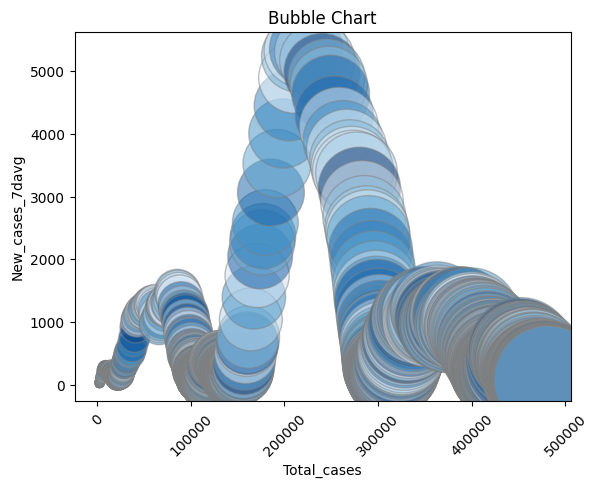

In [ ]:
import numpy as np

scaled_cases  = np.divide(covid.Total_cases, 80)

colors = np.random.rand(1180)

# Draw the scatter diagram
plt.scatter(covid.Total_cases, covid.New_cases_7davg, s=scaled_cases, c=colors, cmap="Blues",edgecolors="grey", alpha=0.5)

# Add X Label on X-axis
plt.xlabel("Total_cases")

# Add Y Label on X-axis
plt.ylabel("New_cases_7davg")

# Add title to graph
plt.title("Bubble Chart")

# rotate x label for clear visualization
plt.xticks(rotation=45)

# Show the plot
plt.show()

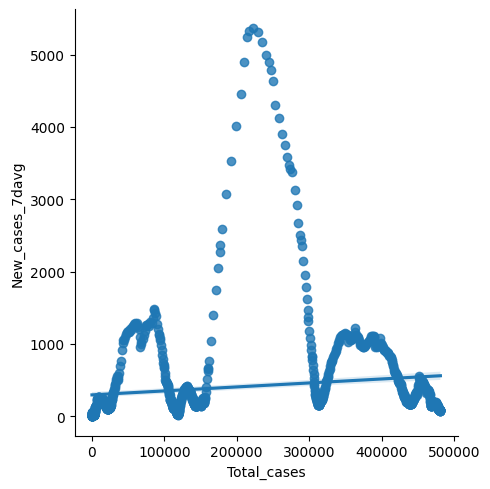

In [ ]:
sns.lmplot(x='Total_cases',y='New_cases_7davg', data=covid)
plt.show()

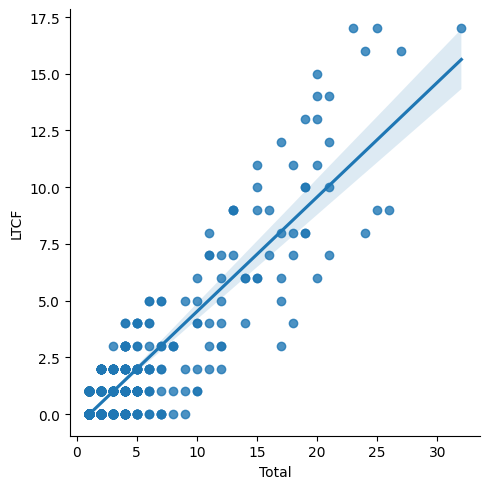

In [ ]:
sns.lmplot(x='Total',y='LTCF', data=death)
plt.show()

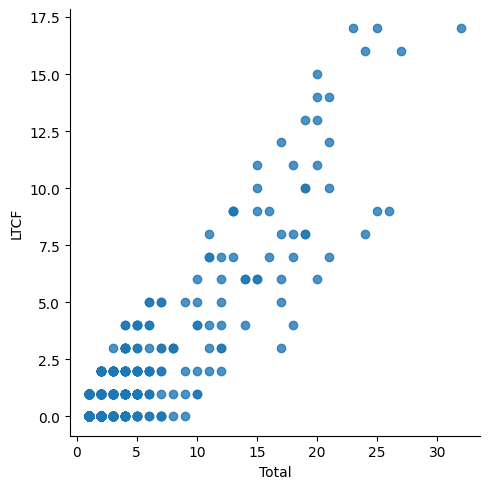

In [ ]:
sns.lmplot(x='Total',y='LTCF', data=death, fit_reg=False)
plt.show()

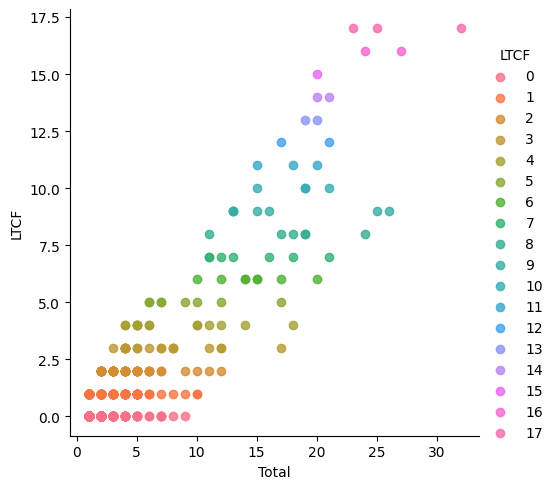

In [ ]:
sns.lmplot(x='Total', y='LTCF', data=death, fit_reg=False, hue='LTCF')

# Show figure
plt.show()

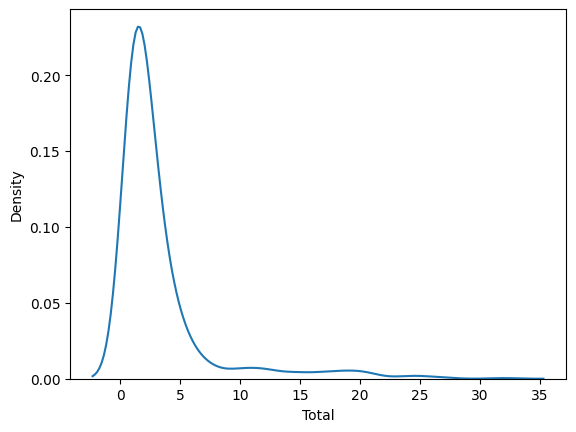

In [ ]:
sns.kdeplot(death.Total)
plt.show()

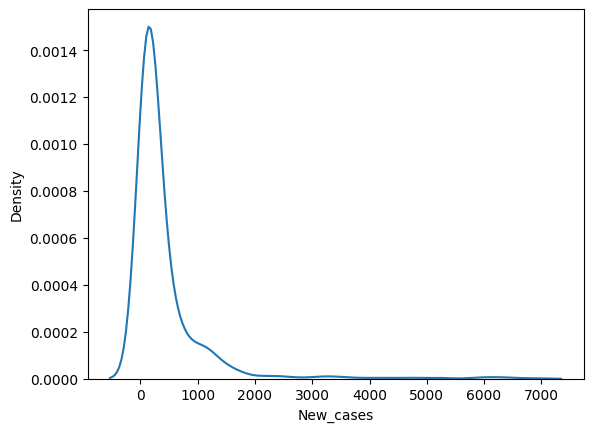

In [ ]:
sns.kdeplot(covid.New_cases)
plt.show()

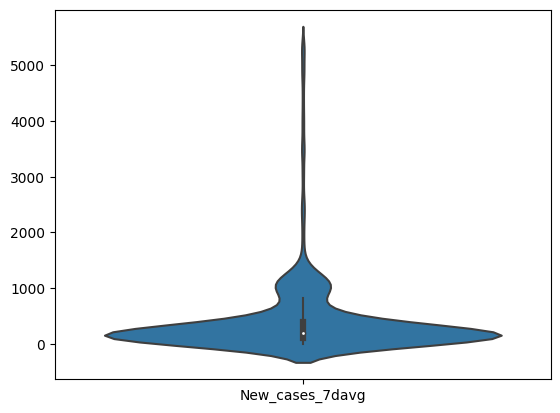

In [ ]:
sns.violinplot(data=covid[['Date','New_cases_7davg']])
plt.show()

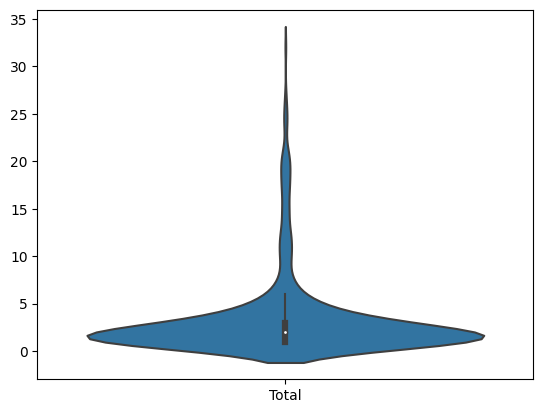

In [ ]:
sns.violinplot(data=death[['Date','Total']])
plt.show()

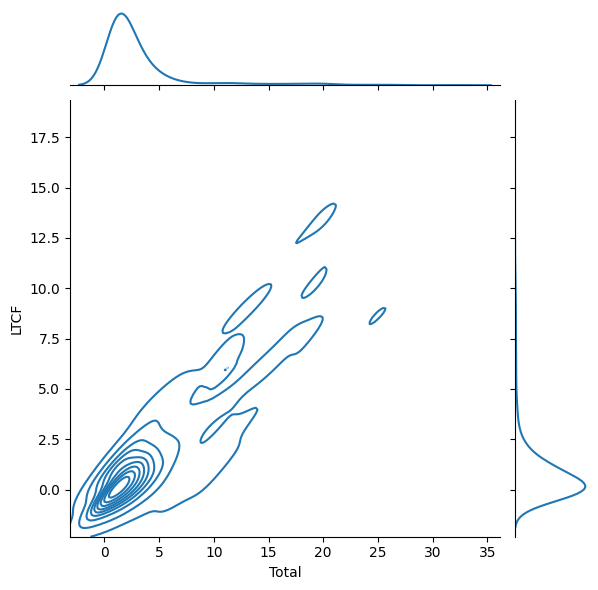

In [ ]:
sns.jointplot(x='Total', y='LTCF', data=death, kind="kde")
plt.show()

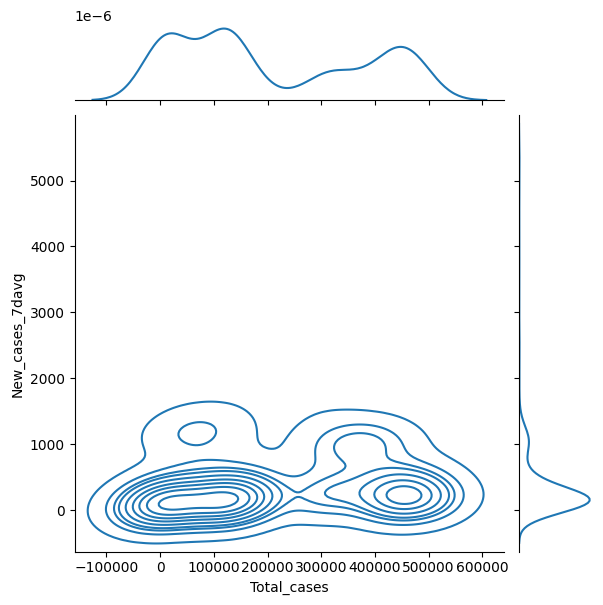

In [ ]:
sns.jointplot(x='Total_cases', y='New_cases_7davg', data=covid, kind="kde")
plt.show()